# P-значение (P-value)

В конце прошлого секминара мы задали вопрос: "В какой момент корреляция начинает быть высокой?"

Хоть мы и знаем, что чем ближе коэффициент корреляции к единице (либо к минус единице), тем "лучше", так как это означает, что у нас имеется некая зависимость между двумя величинами.

Однако каким образом нам определить величину корреляции, на которой мы можем уверенно сказать, что её достаточно, чтобы говорить о зависимости?

Для того, чтобы ответить на этот вопрос в ведём понятие ошибки.

Ошибка — это когда наше предположение не совпадает с действительностью.

Предположим, есть какой-то вопрос, на который можно ответить либо "Да", либо "Нет". Например — "Является ли человек беременным?".

И у нас есть лишь два способа ошибиться в этом случае:

Сказать не беременному человеку, что он беременный, — это называется "ошибкой первого рода", либо же ложноположительным результатом;

И наоборот, сказать беременному человеку, что он не беременный, — это называется "ошибкой второго рода", либо же ложноотрицательным результатом;.

![error_types](images/error_types.png)

Как мы видим из данной ситуации — ошибки второго рода, чаще всего, более опасны, чем ошибки первого рода.

Сказать больному человеку, что он здоров зачастую бывает гораздо хуже, нежели чем сказать здоровому, что он болен, ведь в первом случае мы гарантированно не станем лечить того, кто в лечении однозначно нуждался. Именно поэтому ложноотрицательные срабатывания наиболее нежелательны как в медицине, так и в науке — представьте, что вы проводили большой, дорогой и сложный эксперимент, а потом решили, что он не имеет никакого смысла, в то время как на самом деле он очень даже имел. Вы мало того, что потратили время, силы и ресурсы, так ещё и упустили желаемый результат.

Конечно, если мы очень боимся пропустить по-настоящему больных, было бы куда безопаснее говорить всем приходящим к врачу, что они больны и немедленно начинать лечение, в надежде, что пройдясь по всем пациентам широким фронтом, мы точно не упустим ни одного больного. Одако в реальности у нас нет столько ресурсов, чтобы так поступать.

Однако "перебдеть" всё ещё лучше, чем "недобдеть", именно поэтому в статистике принято фиксировать процент ошибок первого рода (т.е. количество ложноположительных срабатываний), с которыми мы согласны смириться.

Процент ошибок первого рода, мы называем P-значением (P-value).

Исторически сложилось, что пороговыми значениями P-значения в большинстве работ являются $0.05$, $0.01$ и $0.001$, то есть, соответственно, допускаются $5\%$, $1\%$ или $0.1\%$ ошибок первого рода. Если в конкретном случае P-значение не превышает выбранный порог, то считается, что наше утверждение скорее всего не ошибочное. В ином же случае, быть уверенным в правдивости утверждения мы не можем

# Статистическая значимость корреляции

Как всё выше сказанное связано с изначальным вопросом?

"В какой момент корреляция начинает быть высокой?"

Самым прямым: корреляция начинает быть высокой в тот момент, когда её p-значение меньше, чем установленный нами порог ошибки первого рода.

Каким же образом нам вычислять p-значение для нашей корреляции? Всё, что у нас имеется — это два ряда чисел, для которых мы, по формуле, считаем корреляцию. Мы не знаем — есть ли в реальности зависимость между этими двумя рядами или нет, как мы можем говорить о том, ошиблись мы, сказав, что корреляция высокая (или, ещё говорят, статистически значимая) и два ряда зависят друг от друга, или нет?

Чтобы решить эту проблему — пойдём от обратного.

Создадим такую ситуацию, в которой мы гарантированно знаем, что никакой корреляции нет: сгенерируем два ряда случайных чисел.

И посчитаем для них корреляцию.

И сделаем так очень много раз.

А потом проверим насколько часто в такой ситуации возникает статистически значимая корреляция

(то есть, как часто у нас появляются достаточно большие коэффициенты корреляции в ситуации, когда гарантированно никаких зависимостей нет). 

Реализуем всё в виде программы.

Для начала подключим требуемые пакеты: `matplotlib.pyplot` для работы с графиками

In [2]:
import matplotlib.pyplot as plt

И математический пакет `numpy`, для генерации рядов случайных чисел и вычисления их корреляции:

In [3]:
import numpy as np

Пр помощи функции `np.random.rand`, мы можем генерировать ряды случайных чисел заданной длины:

In [4]:
np.random.rand(3)

array([0.71631856, 0.25390284, 0.65333086])

А при помощи функции `np.corrcoef(x, y)` мы получаем корреляционную матрицу между величинами:

In [5]:
np.corrcoef(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [1.1, 1.9, 3.3, 3.9, 4.8, 6.2]
)

array([[1.        , 0.99447516],
       [0.99447516, 1.        ]])

Поскольку у нас всего два ряда чисел, нас интересует только корреляция между первым рядом и вторым. Как видим, она расположена либо в первой сроке и втором столбце корреляционной матрицы, либо во второй строке и первом столбце (корреляционная матрица симметрична — корреляция между $X$ и $Y$ равна корреляции между $Y$ и $X$. А корреляция между $X$ и $X$ равна единице, так же как и между $Y$ и $Y$).

Поэтому, будем брать только элемент матрицы с индексами [0, 1] (первая строка, второй столбец — помним, что нумерация в Python идёт с нуля):

In [6]:
np.corrcoef(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [1.1, 1.9, 3.3, 3.9, 4.8, 6.2]
)[0, 1]

0.9944751561687871

Напишем функцию, которая будет считать корреляцию, между двумя рядами случайных чисел, длины $n$:

In [7]:
def get_random_corr(n=3):
    return np.corrcoef(np.random.rand(n), np.random.rand(n))[0,1]

А теперь $10000$ раз сгенерируем по два ряда состоящих из трёх случайных чисел, каждый раз посчитаем для них корреляцию и запишем полученные коэффициенты корреляции в список `random_corrs`:

In [8]:
n = 3

random_corrs = [get_random_corr(n) for el in range(10000)]

И построим гистограмму для списка коэффициентов корреляции:

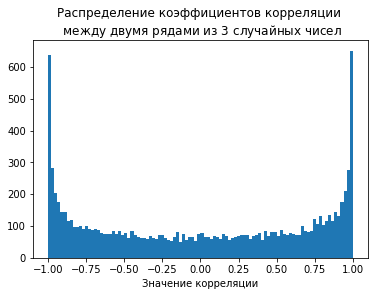

In [27]:
plt.hist(random_corrs, bins=100)
plt.title('Распределение коэффициентов корреляции \n между двумя рядами из $3$ случайных чисел')
plt.xlabel('Значение корреляции')
plt.show()

Мы видим, что у нас получилось очень много "больших" по модулю коэффициентов корреляции (то есть, близких к $1$ или $-1$)

Давайте посмотрим насколько много у нас коэффициентов корреляции больших или равных, чем $0.95$. Ипользуем для этого списковые включения с условием:

In [40]:
# Выбрать из random_corrs такие r, что они больше или равны 0.95

very_big_rs = [r for r in random_corrs if r >= 0.95]

Посмотрим, что у нас получилось:

In [42]:
very_big_rs[:5]

[0.9995427251718378,
 0.9996380351145336,
 0.9864676313494769,
 0.9777788871479435,
 0.986952374280945]

In [43]:
len(very_big_rs)

1034

Как мы убедились выше, мы поместили в список `very_big_rs` только коэфициенты корреляции большие или равные $0.95$. И таковых коэффициентов у нас набралось 1034 штуки.

А сколько это процентов от всех сгенерированных коэффициентов корреляции?

Возьмём это число и разделим на $10000$ (именно столько мы сгенерировали коэфициентов выше):

In [30]:
len(very_big_rs) / 10000

0.1034

Или $10.34\%$ процента.

То есть, вероятность того, что два списка из трёх случайных величин имеют корреляцию равную или большую чем $0.95$, равна примерно $10\%$

Только что мы посчитали так называемое "одностороннее p-значение", даже "правостороннее". Давайте посчитаем "левостороннее".

Для этого сделаем всё то же самое, но выберем коэфициенты корреляции меньшие или равные $-0.95$:

In [45]:
very_small_rs = [r for r in random_corrs if r <= -0.95]

In [46]:
len(very_small_rs)/10000

0.1024

Как видим, вероятность того, что два списка из трёх случайных величин имеют корреляцию $\le -0.95$ также равна примерно $10\%$.

Можно построить вертикальные линии на нашей гистограмме в точках $-0.95$ и $0.95$ и убедиться, что в принципе гистограмма у нас симметрична и вероятность получить большие отрицательные значения равна вероятности получить большие положительные:

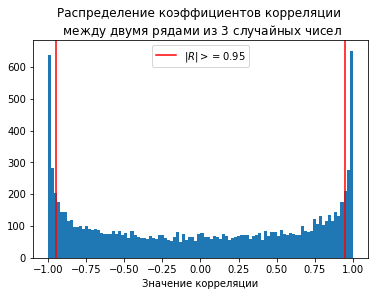

In [64]:
plt.hist(random_corrs, bins=100)
plt.title(f'Распределение коэффициентов корреляции \n между двумя рядами из ${n}$ случайных чисел')
plt.xlabel('Значение корреляции')
plt.axvline(-0.95, c='red')
plt.axvline(0.95, c='red', label='$|R|>=0.95$')
plt.legend()
plt.show()

Мы посчитали два односторонних p-значения, однако нас интересует "двустороннее".

Конечно, мы можем просто сложить два двусторонних, но надёжнее поступить так:

Выберем из нашего списка коэфициентов корреляции только те, которые по модулю больше, чем $0.95$:

In [47]:
very_big_and_very_small_rs = [r for r in random_corrs if abs(r) >= 0.95]

И разделим их количество на общее число коэфициентов корреляции:

In [49]:
len(very_big_and_very_small_rs) / 10000

0.2058

$0.20$ — это и есть интересующее нас двустороннее p-значение для коэффициента корреляции $0.95$ и списков длины $3$.

Конечно, для того, чтобы посчитать p-значение для иного значения коэфициента корреляции и иного числа элементов в списках, нам не обязательно каждый раз проделывать всё вышеописанное. Мы можем воспользоваться либо небольшой математической магией, которая буквально проделвет это за нас:

In [55]:
from scipy.stats import t


def get_t_stat(r: float, n: int) -> float:
    return (r * np.sqrt(n - 2)) / (np.sqrt(1 - r ** 2))


def get_p_value(r: float, n: int) -> float:
    r = abs(r)
    t_stat = get_t_stat(r, n)
    return t.sf(t_stat, n - 2) * 2

In [56]:
get_p_value(0.95, 3)

0.20216524820851975

Как мы видим, полученное нами p-значение не сильно отличается от полученного при помощи "математической магии".

Либо же мы и вовсе можем использовать готовую функцию вычисления коэффициента корреляции из пакета `scipy.stats`:

In [50]:
from scipy.stats import pearsonr

Она называется `pearsonr` так как корреляцию, считаемую по той формуле, которую мы с вами приводили на шестом занятии, ещё называют "коэффициентом корреляции Пирсона".

Функци `pearsonr` принимает два значения — два ряда чисел, между которыми считается корреляция, и возвращает два значения — первое это коэффициент корреляции между двумя рядами, а второе — соответствующее ему p-значение:

In [61]:
r, p = pearsonr(
    [0.97065661, 0.61383435, 0.26693135],
    [0.95895777, 0.32514086, 0.159267]
)

In [63]:
print(f'Корреляция: {r:.2f}, p-value: {p:.2f}')

Корреляция: 0.95, p-value: 0.20


Как мы видим, и тут для коэффициента корреляции $0.95$ нам выдалось значение $0.20$.

О чём говорит это значение?

О том, что у нас имеется двадцатипроцентая вероятность получить высокое значение корреляции между думя рядами состоящиз из трёх совершенно случайных чисел.

А раз $20\%$ превышает все установленные нами пороги ($5\%$, $1\%$ или $0.1\%$), то мы не можем называть корреляцию $0.95$ значимой для списков из трёх значений.

Почему мы постоянно оговариваемся про длины наших рядов? Давайте проделаем всё то же самое, но с рядами из пяти случайных чисел:

In [65]:
n = 5

random_corrs = [get_random_corr(n) for el in range(10000)]

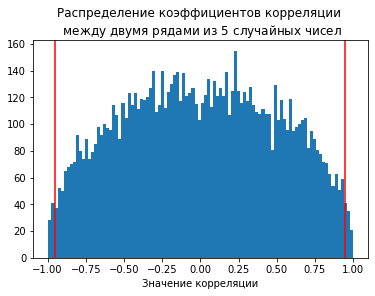

In [67]:
plt.hist(random_corrs, bins=100)
plt.title(f'Распределение коэффициентов корреляции \n между двумя рядами из ${n}$ случайных чисел')
plt.xlabel('Значение корреляции')
plt.axvline(-0.95, c='red')
plt.axvline(0.95, c='red', label='$|R|>=0.95$')
plt.show()

In [68]:
very_big_and_very_small_rs = [r for r in random_corrs if abs(r) >= 0.95]
len(very_big_and_very_small_rs) / 10000

0.0156

(ну или просто используем реализованную функцию)

In [69]:
get_p_value(0.95, 5)

0.013320011010141254

Видно, что вероятность получить большую корреляцию между рядами из пяти случайных чисел, меньше, чем из трёх.

В этом случае у нас вероятность получить ложную корреляцию выше $0.95$ всего лишь в районе $1\%$ и это уже ниже порога в $5\%$ — если мы изначально готовы к пяти процентам ложноположительных ошибок, то в этом случае мы можем сказать, что корреляция $0.95$ значима.

Конечною, чем больше у нас длина рядов, тем меньше вероятность получить большую корреляцию случайным образом:

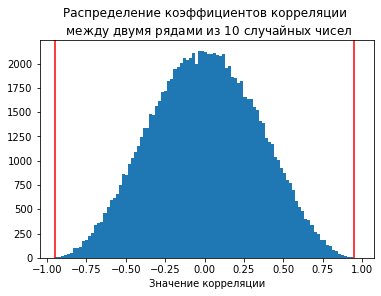

In [83]:
n = 10

random_corrs = [get_random_corr(n) for el in range(100000)]

plt.hist(random_corrs, bins=100)
plt.title(f'Распределение коэффициентов корреляции \n между двумя рядами из ${n}$ случайных чисел')
plt.xlabel('Значение корреляции')
plt.axvline(-0.95, c='red')
plt.axvline(0.95, c='red', label='$|R|>=0.95$')
plt.show()

In [84]:
very_big_and_very_small_rs = [r for r in random_corrs if abs(r) >= 0.95]
len(very_big_and_very_small_rs) / 100000

4e-05

In [78]:
get_p_value(0.95, 10)

2.5737060546875074e-05

Для десяти случайных чисел, вероятность корреляции выше $0.95$ (по модулю) уже меньше, чем $0.0001\%$ (нам даже пришлось поднять число генерируемых коэфициентов корреляции с $10000$ до $100000$, поскольку при $10000$ у нас таких коэффициентов почти не возникало).

Для сотни же случайных чисел, уже практически невозможно получить корреляцию выше $0.5$:

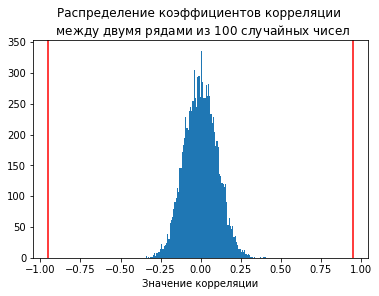

In [87]:
n = 100

random_corrs = [get_random_corr(n) for el in range(10000)]

plt.hist(random_corrs, bins=100)
plt.title(f'Распределение коэффициентов корреляции \n между двумя рядами из ${n}$ случайных чисел')
plt.xlabel('Значение корреляции')
plt.axvline(-0.95, c='red')
plt.axvline(0.95, c='red', label='$|R|>=0.95$')
plt.show()

Так что если у нас, при коррелировании двух очень длинных списков чисел, возникнет большая корреляци, мы поймём, что вероятность её случайного возникновения невероятно мала и с большой уверенностью можно утверждать, что мы не совершаем ошибку, говоря о наличии зависимостей.

Однако p-значение — не панацея. Не стоит бездумно применять его в любых ситуациях.

Критике также подвергаются и исторически установленные пороги — многие научные журналы отказываются принимать статьи с порогом в пять процентов, считая его слишком большим, а некоторые современные исследования показывают, что желательно прекратить использовать даже однопроцентный.

На следующем семинаре мы рассмотрим альтернативные методы обнаружения и обозначения зависимости между двумя рядами чисел, иногда считающиеся более надёжными, нежели корреляция.